In [1]:
import pandas as pd

df= pd.read_csv("Limpezaprofunca.csv")
df.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,54,2011-03-13 00:00:00,2036981,141381.0,0,453.0,1781,2011,2011,1,...,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,FREDERICO C.P. CARVALHEIRA NETO,356547,NaN,NaN,50.00,0.0,50.00,NaN
1,53,2011-01-12 00:00:00,1992312,139212.0,0,355.0,1965,2007,2011,4,...,COMBUSTÍVEIS E LUBRIFICANTES.,Sem especificações,ARV AUTO POSTO,089839,NaN,NaN,100.00,0.0,100.00,NaN
2,54,2012-04-24 00:00:00,2304988,160562.0,0,434.0,2368,2011,2012,0,...,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AGUAS GUARIROBA S.A,1575040,NaN,NaN,62.89,0.0,62.89,NaN
3,55,2017-05-17 00:00:00,6297554,160508.0,0,182.0,2406,2015,2017,1,...,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,HP COMERCIO E DERIVADOS DE PETROLEO LTDA,109849,NaN,NaN,148.73,0.0,148.73,NaN
4,55,2016-10-24 00:00:00,1371464,74262.0,0,338.0,1552,2015,2016,0,...,Emissão Bilhete Aéreo,NaN,Cia Aérea - AZUL,Bilhete: AYLVXZ,Carlos Sampaio,BSB/VCP,160.00,0.0,160.00,NaN


# Limpeza no dataset para melhorar a compreençao dos dados.

In [2]:
df.drop(columns=["txtcnpjcpf","codlegislatura","idedocumento","idecadastro","indtipodocumento","nucarteiraparlamentar","nudeputadoid","nulegislatura","numespecificacaosubcota","numlote","numparcela","numressarcimento","numsubcota","txtcnpjcpf","txtnumero","txttrecho"], inplace=True)

In [3]:
df.head()

,datemissao,numano,nummes,sgpartido,sguf,txnomeparlamentar,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtpassageiro,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,2011-03-13 00:00:00,2011,3,PT,PR,ANGELO VANHONI,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,FREDERICO C.P. CARVALHEIRA NETO,NaN,50.00,0.0,50.00,NaN
1,2011-01-12 00:00:00,2011,1,PMDB,SP,FRANCISCO ROSSI,COMBUSTÍVEIS E LUBRIFICANTES.,Sem especificações,ARV AUTO POSTO,NaN,100.00,0.0,100.00,NaN
2,2012-04-24 00:00:00,2012,4,PR,MS,GIROTO,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AGUAS GUARIROBA S.A,NaN,62.89,0.0,62.89,NaN
3,2017-05-17 00:00:00,2017,5,PT,BA,Afonso Florence,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,HP COMERCIO E DERIVADOS DE PETROLEO LTDA,NaN,148.73,0.0,148.73,NaN
4,2016-10-24 00:00:00,2016,10,PSDB,SP,Carlos Sampaio,Emissão Bilhete Aéreo,NaN,Cia Aérea - AZUL,Carlos Sampaio,160.00,0.0,160.00,NaN


# Valor gasto por policos do nosso DataFreme

In [4]:
# Tópico 1
media_de_gasto = df["vlrliquido"].median()
maior_gasto = df['vlrliquido'].max()
menor_gasto = df["vlrliquido"].min()
gasto_total= df["vlrliquido"].sum()
print(f"A média de gasto é : {media_de_gasto}")
print(f"O maior gasto foi : {maior_gasto}")
print(f"O menor gasto foi : {menor_gasto}")
print(f"O valor total gasto foi : {gasto_total}")

A média de gasto é : 122.97999999999999
O maior gasto foi : 80000.0
O menor gasto foi : -2302.24
O valor total gasto foi : 2579014.5300000003


# Descobrir os maiores gastadores por politico

In [5]:
# Tópico 2

pessoa_que_gasta_mais = df["txnomeparlamentar"].value_counts()
print(pessoa_que_gasta_mais)

txnomeparlamentar
JORGE TADEU MUDALEN    30
JÔ MORAES              27
Eduardo Barbosa        25
Vanderlei Macris       24
Afonso Hamm            24
                       ..
OLAVO CALHEIROS         1
Lucas Redecker          1
WADIH DAMOUS            1
JOSÉ FOGAÇA             1
ROGÉRIO SILVA           1
Name: count, Length: 1101, dtype: int64


# Pegar os 2 maiores gastadores e ver com o que eles gastaram

In [6]:
#Tópico 3 JORGE TADEU MUDALEN 

gastador_1 = df.loc[df["txnomeparlamentar"] == "JORGE TADEU MUDALEN"]
gastador_1.head()

,datemissao,numano,nummes,sgpartido,sguf,txnomeparlamentar,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtpassageiro,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
26,2010-12-13 00:00:00,2010,12,DEM,SP,JORGE TADEU MUDALEN,LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...,NaN,CONCESS. RODOVIA OESTE DE SAO PAULO SA,NaN,2.9,0.0,2.9,NaN
223,2013-09-10 00:00:00,2013,9,DEM,SP,JORGE TADEU MUDALEN,LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...,NaN,CONCESSIONARIA AUTO RAPOSO TAVARES,NaN,3.5,0.0,3.5,NaN
507,2010-09-14 00:00:00,2010,9,DEM,SP,JORGE TADEU MUDALEN,LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...,NaN,CONCESS. DA RODOVIA PRESIDENTE DUTRA S/A,NaN,4.1,0.0,4.1,NaN
699,2017-01-19 00:00:00,2017,1,DEM,SP,JORGE TADEU MUDALEN,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",NaN,CONCESS. RODOVIA OESTE DE SÃO PAULO,NaN,4.0,0.0,4.0,NaN
762,2010-07-18 00:00:00,2010,7,DEM,SP,JORGE TADEU MUDALEN,LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...,NaN,CONCESS.RODOVIA OESTE DE SÃO PAULO S/A,NaN,7.9,0.0,7.9,NaN


In [7]:
# Médias de gasto
gastador_1_media = gastador_1["vlrliquido"].median()
gastador_1_max = gastador_1["vlrliquido"].max()
gastador_1_min = gastador_1["vlrliquido"].min()

print(f"A média de gasto é: {gastador_1_media}")
print(f"O maior gasto foi: {gastador_1_max}")
print(f"O menor gasto foi: {gastador_1_min}")

A média de gasto é: 7.3
O maior gasto foi: 2000.0
O menor gasto foi: 2.4


In [8]:
# Os produtos que foram comprados

produtos_mais_comprados = gastador_1["txtdescricao"].value_counts()
produtos_mais_comprados.head(10)

txtdescricao
LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES    11
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                        8
COMBUSTÍVEIS E LUBRIFICANTES.                                    4
Emissão Bilhete Aéreo                                            3
TELEFONIA                                                        2
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR        1
LOCOMOÇÃO, ALIMENTAÇÃO E  HOSPEDAGEM                             1
Name: count, dtype: int64

In [9]:
# Agora vamos ver quanto foi gasto com cada produto

locacao_de_veiculos = gastador_1.loc[gastador_1["txtdescricao"] == "LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES"]
locacao_de_veiculos = locacao_de_veiculos["vlrliquido"].sum()
print(f"O total gasto com locação de veículos automotores ou fretamento de embarcações é: {locacao_de_veiculos}")

servicos_taxi = gastador_1.loc[gastador_1["txtdescricao"] == "SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO"]
servicos_taxi = servicos_taxi["vlrliquido"].sum()
print(f"O total gasto com SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO é: {servicos_taxi}")

comb_lubr = gastador_1.loc[gastador_1["txtdescricao"] == "COMBUSTÍVEIS E LUBRIFICANTES."]
comb_lubr = comb_lubr["vlrliquido"].sum()
print(f"O total gasto com COMBUSTÍVEIS E LUBRIFICANTES. é: {comb_lubr}")

bilhete_aereo = gastador_1.loc[gastador_1["txtdescricao"] == "Emissão Bilhete Aéreo"]
bilhete_aereo = bilhete_aereo["vlrliquido"].sum()
print(f"O total gasto com Emissão Bilhete Aéreo é: {bilhete_aereo}")

telefonia = gastador_1.loc[gastador_1["txtdescricao"] == "TELEFONIA"]
telefonia = telefonia["vlrliquido"].sum()
print(f"O total gasto com TELEFONIA é: {telefonia}")

manutencao = gastador_1.loc[gastador_1["txtdescricao"] == "MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR"]
manutencao = manutencao["vlrliquido"].sum()
print(f"O total gasto com MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR é: {manutencao}")

loc_ali_hosp = gastador_1.loc[gastador_1["txtdescricao"] == "LOCOMOÇÃO, ALIMENTAÇÃO E  HOSPEDAGEM"]
loc_ali_hosp = loc_ali_hosp["vlrliquido"].sum()
print(f"O total gasto com LOCOMOÇÃO, ALIMENTAÇÃO E HOSPEDAGEM é: {loc_ali_hosp}")


O total gasto com locação de veículos automotores ou fretamento de embarcações é: 60.199999999999996
O total gasto com SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO é: 52.0
O total gasto com COMBUSTÍVEIS E LUBRIFICANTES. é: 2190.0
O total gasto com Emissão Bilhete Aéreo é: 1337.93
O total gasto com TELEFONIA é: 254.22000000000003
O total gasto com MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR é: 338.57
O total gasto com LOCOMOÇÃO, ALIMENTAÇÃO E HOSPEDAGEM é: 7.1


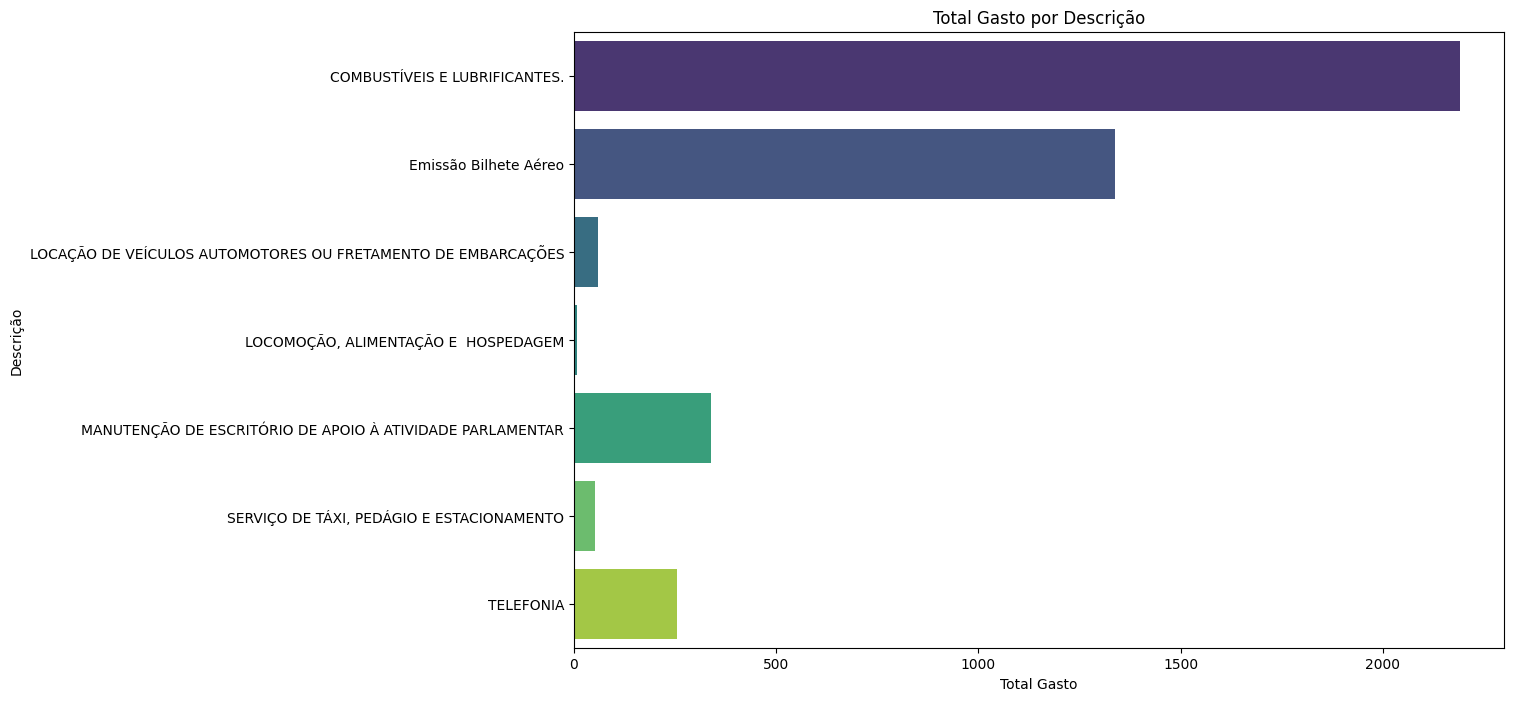

In [10]:
# Os dados em gráfico do JORGE TADEU MUDALEN

import seaborn as sns 
import matplotlib.pyplot as plt

gastos_por_produto = gastador_1.groupby('txtdescricao')['vlrliquido'].sum().reset_index()
gastos_por_produto.columns = ['Descrição', 'Total Gasto']

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Gasto', y='Descrição', data=gastos_por_produto, palette='viridis', hue='Descrição', dodge=False)
plt.xlabel('Total Gasto')
plt.title('Total Gasto por Descrição')
plt.show()

In [11]:
# Nosso segundo Gastador

gastador_2 = df.loc[df["txnomeparlamentar"] == "JÔ MORAES"]
gastador_2.head()

,datemissao,numano,nummes,sgpartido,sguf,txnomeparlamentar,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtpassageiro,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
72,2018-03-01 00:00:00,2018,3,PCdoB,MG,JÔ MORAES,TELEFONIA,NaN,CLARO S.A.,NaN,65.75,1.0,64.75,NaN
74,2012-08-28 00:00:00,2012,8,PCdoB,MG,JÔ MORAES,LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...,NaN,RADIO TAXI ALVORADA LTDA,NaN,71.00,0.0,71.00,NaN
174,2013-07-01 00:00:00,2013,7,PCdoB,MG,JÔ MORAES,Emissão Bilhete Aéreo,NaN,Cia Aérea - TAM,JÔ MORAES,80.00,0.0,80.00,NaN
326,2010-11-18 00:00:00,2010,11,PCdoB,MG,JÔ MORAES,Emissão Bilhete Aéreo,NaN,Cia Aérea - GOL,JÔ MORAES,-284.02,0.0,-284.02,NaN
369,2011-07-01 00:00:00,2011,7,PCdoB,MG,JÔ MORAES,Emissão Bilhete Aéreo,NaN,Cia Aérea - GOL,JÔ MORAES,99.52,0.0,99.52,NaN


In [12]:
# Médias de gasto
gastador_2_media = gastador_2["vlrliquido"].median()
gastador_2_max = gastador_2["vlrliquido"].max()
gastador_2_min = gastador_2["vlrliquido"].min()

print(f"A média de gasto é: {gastador_2_media}")
print(f"O maior gasto foi: {gastador_2_max}")
print(f"O menor gasto foi: {gastador_2_min}")

A média de gasto é: 40.0
O maior gasto foi: 668.2
O menor gasto foi: -284.02


In [13]:
# Os produtos que foram comprados

produtos_mais_comprados = gastador_2["txtdescricao"].value_counts()
produtos_mais_comprados.head(10)

txtdescricao
LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES    7
Emissão Bilhete Aéreo                                           7
SERVIÇOS POSTAIS                                                5
TELEFONIA                                                       4
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                       4
Name: count, dtype: int64

In [14]:
# Agora vamos ver quanto foi gasto com cada produto

locacao_de_veiculos_2 = gastador_2.loc[gastador_2["txtdescricao"] == "LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES"]
locacao_de_veiculos_2 = locacao_de_veiculos_2["vlrliquido"].sum()
print(f"O total gasto com locação de veículos automotores ou fretamento de embarcações é: {locacao_de_veiculos_2}")

bilhete_aereo_2 = gastador_2.loc[gastador_2["txtdescricao"] == "Emissão Bilhete Aéreo"]
bilhete_aereo_2 = bilhete_aereo_2["vlrliquido"].sum()
print(f"O total gasto com Emissão Bilhete Aéreo é: {bilhete_aereo_2}")

telefonia_2 = gastador_2.loc[gastador_2["txtdescricao"] == "TELEFONIA"]
telefonia_2 = telefonia_2["vlrliquido"].sum()
print(f"O total gasto com TELEFONIA é: {telefonia_2}")

servicos_postais = gastador_2.loc[gastador_2["txtdescricao"] == "SERVIÇOS POSTAIS"]
servicos_postais =servicos_postais["vlrliquido"].sum()
print(f"O total gasto com SERVIÇOS POSTAIS é: {servicos_postais}")

servicos_taxi_p = gastador_2.loc[gastador_2["txtdescricao"] == "SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO"]
servicos_taxi_p = servicos_taxi_p["vlrliquido"].sum()
print(f"O total gasto com SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO é: {servicos_taxi_p}")


O total gasto com locação de veículos automotores ou fretamento de embarcações é: 277.2
O total gasto com Emissão Bilhete Aéreo é: 463.76
O total gasto com TELEFONIA é: 815.06
O total gasto com SERVIÇOS POSTAIS é: 793.4100000000001
O total gasto com SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO é: 106.1


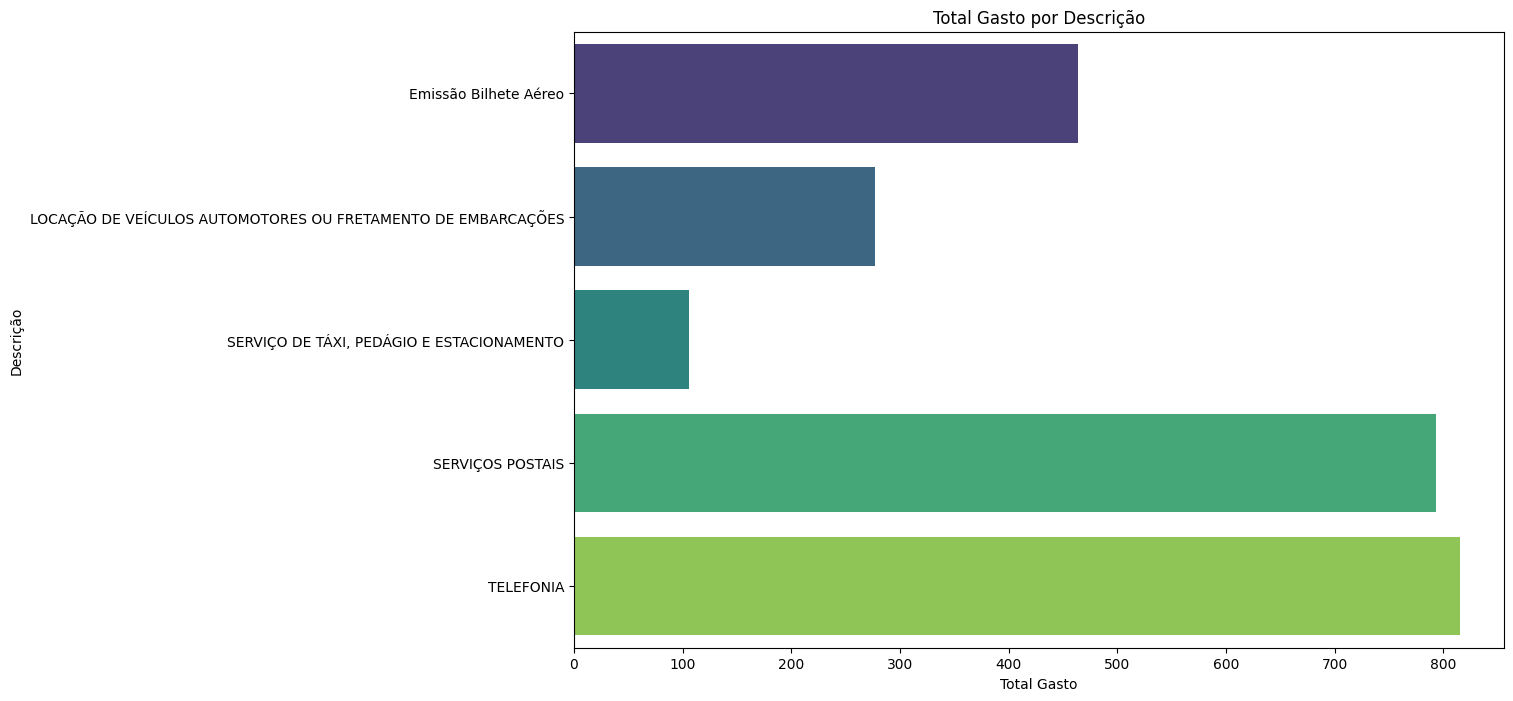

In [15]:
#Uma exibição em grafico

gastos_por_produto_2 = gastador_2.groupby('txtdescricao')['vlrliquido'].sum().reset_index()
gastos_por_produto_2.columns = ['Descrição', 'Total Gasto']

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Gasto', y='Descrição', data=gastos_por_produto_2, palette='viridis', hue='Descrição', dodge=False)
plt.xlabel('Total Gasto')
plt.title('Total Gasto por Descrição')
plt.show()

# Comparação por Partido 

In [17]:
partidos = df["sgpartido"]
partidos.unique()

array(['PT', 'PMDB', 'PR', 'PSDB', 'MDB', 'PROS', 'PV', 'PP', 'PDT', 'SD',
       'PSOL', 'PP**', 'PSD', 'DEM', 'PODE', 'PSB', 'PRP', 'PTB', 'PCdoB',
       'PTdoB', 'SOLIDARIEDADE', 'PSL', 'AVANTE', 'PATRI', 'PPS',
       'REPUBLICANOS', 'PMN', 'PRB', 'PSC', 'PATRIOTA', 'PL', 'CIDADANIA',
       'PTC', 'REDE', 'S.PART.', 'PHS', 'PPL', 'PSDC', 'NOVO', 'PRTB'],
      dtype=object)

# Listas de partidos por orientação política

In [26]:
partidos_centro = ['MDB', 'PSDB', 'CIDADANIA', 'PODE', 'PSD', 'PV', 'PROS', 'SOLIDARIEDADE']
partidos_direita = ['PL', 'PP', 'PR', 'PRTB', 'PSL', 'PATRI', 'AVANTE', 'PSC', 'REPUBLICANOS', 
                    'PMDB', 'PP**', 'PRP', 'DEM', 'PATRIOTA', 'PRB', 'NOVO']
partidos_esquerda = ['PT', 'PCdoB', 'PSOL', 'PDT', 'REDE', 'PSB', 'PTB', 'PPS', 'PTdoB']

# Partidos que não se encaixam diretamente ou extintos/fundidos
partidos_outros = ['S.PART.', 'PHS', 'PPL', 'PSDC', 'PMN', 'PTC']

# Filtrar o DataFrame para cada grupo

In [27]:
partido_Centro = df.loc[df["sgpartido"].isin(partidos_centro)]
partido_Direita = df.loc[df["sgpartido"].isin(partidos_direita)]
partido_Esquerda = df.loc[df["sgpartido"].isin(partidos_esquerda)]
partido_Outros = df.loc[df["sgpartido"].isin(partidos_outros)]

# Gasto tatal de cada grupo

In [44]:
gasto_Centro = partido_Centro["vlrliquido"].sum()
print(f"O partido PSDB teve um gasto total de : {gasto_Centro}")
gasto_Direita = partido_Direita["vlrliquido"].sum()
print(f"O partido PSDB teve um gasto total de : {gasto_Direita}")
gasto_Esquerda = partido_Esquerda["vlrliquido"].sum()
print(f"O partido PSDB teve um gasto total de : {gasto_Esquerda}")
gasto_Outros = partido_Outros["vlrliquido"].sum()
print(f"O partido PSDB teve um gasto total de : {gasto_Outros}")

soma_total_gastos = soma_total_gastos = pd.DataFrame({'Grupo': ['Centro', 'Direita', 'Esquerda', 'Outros'],'Total de Gastos': [gasto_Centro, gasto_Direita, gasto_Esquerda, gasto_Outros]})

O partido PSDB teve um gasto total de : 639670.32
O partido PSDB teve um gasto total de : 965293.26
O partido PSDB teve um gasto total de : 907067.21
O partido PSDB teve um gasto total de : 13039.75


# Total de gasto em grafico

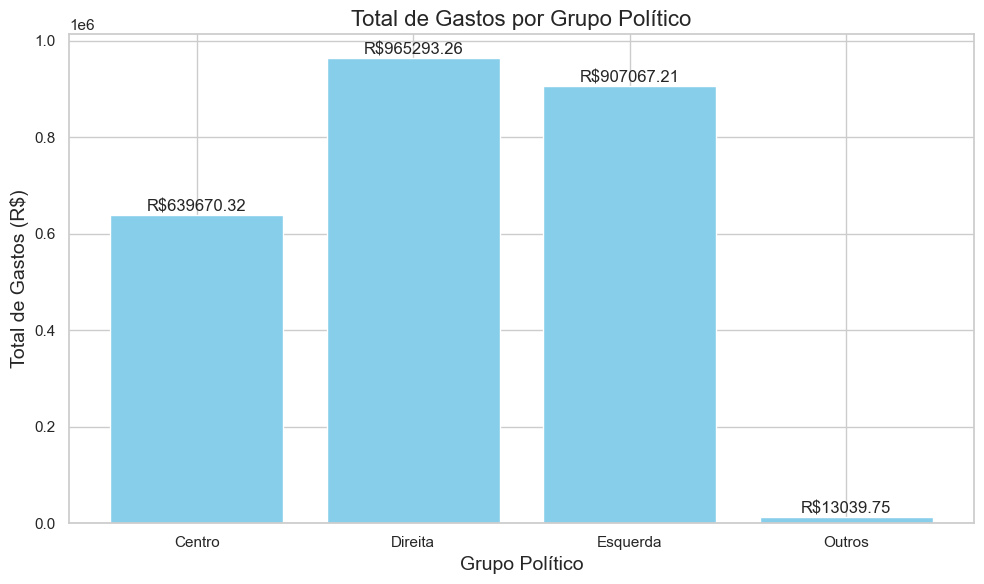

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(soma_total_gastos['Grupo'], soma_total_gastos['Total de Gastos'], color='skyblue')
plt.title('Total de Gastos por Grupo Político', fontsize=16)
plt.xlabel('Grupo Político', fontsize=14)
plt.ylabel('Total de Gastos (R$)', fontsize=14)
for index, value in enumerate(soma_total_gastos['Total de Gastos']):
    plt.text(index, value, f'R${value:.2f}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

# Qual Produto os partidos mais gastaram

In [34]:
gastos_Centro = partido_Centro.groupby("txtdescricao")["vlrliquido"].sum().reset_index()
gastos_Direita = partido_Direita.groupby("txtdescricao")["vlrliquido"].sum().reset_index()
gastos_Esquerda = partido_Esquerda.groupby("txtdescricao")["vlrliquido"].sum().reset_index()
gastos_Outros = partido_Outros.groupby("txtdescricao")["vlrliquido"].sum().reset_index()

gastos_Centro.columns = ['Descrição do Produto', 'Total Gasto Centro']
gastos_Direita.columns = ['Descrição do Produto', 'Total Gasto Direita']
gastos_Esquerda.columns = ['Descrição do Produto', 'Total Gasto Esquerda']
gastos_Outros.columns = ['Descrição do Produto', 'Total Gasto Outros']

# Combinar os Dados em uma única tabela

In [ ]:
resultado_final = pd.merge(gastos_Centro, gastos_Direita, on='Descrição dos Gastos', how='outer')
resultado_final = pd.merge(resultado_final, gastos_Esquerda, on='Descrição dos Gastos', how='outer')
resultado_final = pd.merge(resultado_final, gastos_Outros, on='Descrição dos Gastos', how='outer')


In [35]:
resultado_final

,Descrição do Produto,Total Gasto Centro,Total Gasto Direita,Total Gasto Esquerda,Total Gasto Outros
0,AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.,239.40,NaN,675.00,NaN
1,AQUISIÇÃO OU LOC. DE SOFTWARE; SERV. POSTAIS; ...,649.80,NaN,37.40,NaN
2,ASSINATURA DE PUBLICAÇÕES,1933.61,2023.78,762.30,NaN
3,COMBUSTÍVEIS E LUBRIFICANTES.,58620.74,97044.22,71379.62,838.80
4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",46480.86,131947.91,57645.00,4000.00
5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,96886.84,174919.73,177288.27,NaN
6,Emissão Bilhete Aéreo,161180.57,212451.37,195771.71,4793.02
7,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,5708.41,7288.98,6160.39,211.36
8,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",8949.32,8125.95,6632.92,NaN
9,LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO ...,16383.20,27816.67,59566.37,58.00


# Agora mostrar uma visualição gráfica dos Dados

<Figure size 1400x800 with 0 Axes>

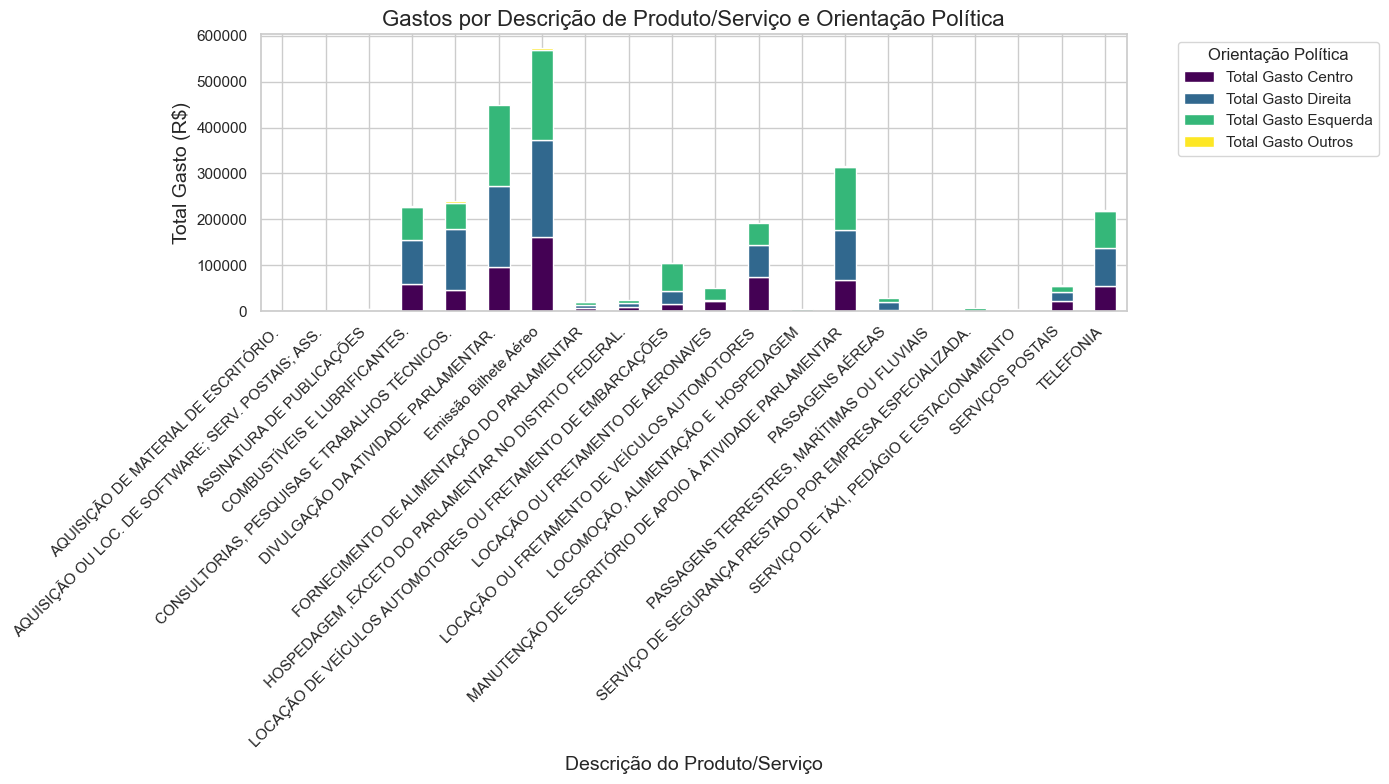

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
resultado_final.set_index('Descrição do Produto').plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title('Gastos por Descrição de Produto/Serviço e Orientação Política', fontsize=16)
plt.xlabel('Descrição do Produto/Serviço', fontsize=14)
plt.ylabel('Total Gasto (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Orientação Política', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Agora veremos as Datas que esses valores foram gastos por cada grupo politico

In [52]:
data_gastos_Centro = partido_Centro.groupby("numano")["vlrliquido"].sum().reset_index()
data_gastos_Direita = partido_Direita.groupby("numano")["vlrliquido"].sum().reset_index()
data_gastos_Esquerda = partido_Esquerda.groupby("numano")["vlrliquido"].sum().reset_index()
data_gastos_Outros = partido_Outros.groupby("numano")["vlrliquido"].sum().reset_index()

data_gastos_Centro.columns = ['Data dos gastos', 'Total Gasto Centro']
data_gastos_Direita.columns = ['Data dos gastos', 'Total Gasto Direita']
data_gastos_Esquerda.columns = ['Data dos gastos', 'Total Gasto Esquerda']
data_gastos_Outros.columns = ['Data dos gastos', 'Total Gasto Outros']

data_gasto_de_cada_grupo = pd.merge(data_gastos_Centro, data_gastos_Direita, on="Data dos gastos", how="outer")
data_gasto_de_cada_grupo = pd.merge(data_gasto_de_cada_grupo, data_gastos_Esquerda, on="Data dos gastos", how="outer")
data_gasto_de_cada_grupo = pd.merge(data_gasto_de_cada_grupo, data_gastos_Outros, on="Data dos gastos", how="outer")

In [54]:
data_gasto_de_cada_grupo

,Data dos gastos,Total Gasto Centro,Total Gasto Direita,Total Gasto Esquerda,Total Gasto Outros
0,2009,10193.48,41454.14,40171.37,391.57
1,2010,22753.63,62637.73,100213.83,1519.37
2,2011,46340.14,76147.40,70165.09,5031.13
3,2012,34056.67,55500.28,72932.49,1231.26
4,2013,45010.82,157142.21,94131.64,558.70
5,2014,46813.67,84884.28,79779.62,1089.88
6,2015,77999.43,119258.16,80685.75,237.83
7,2016,110423.25,80012.51,103303.05,1654.21
8,2017,120130.20,107388.39,68093.57,1124.08
9,2018,43589.40,81964.91,116040.94,201.72


# Vizualização Grafica 

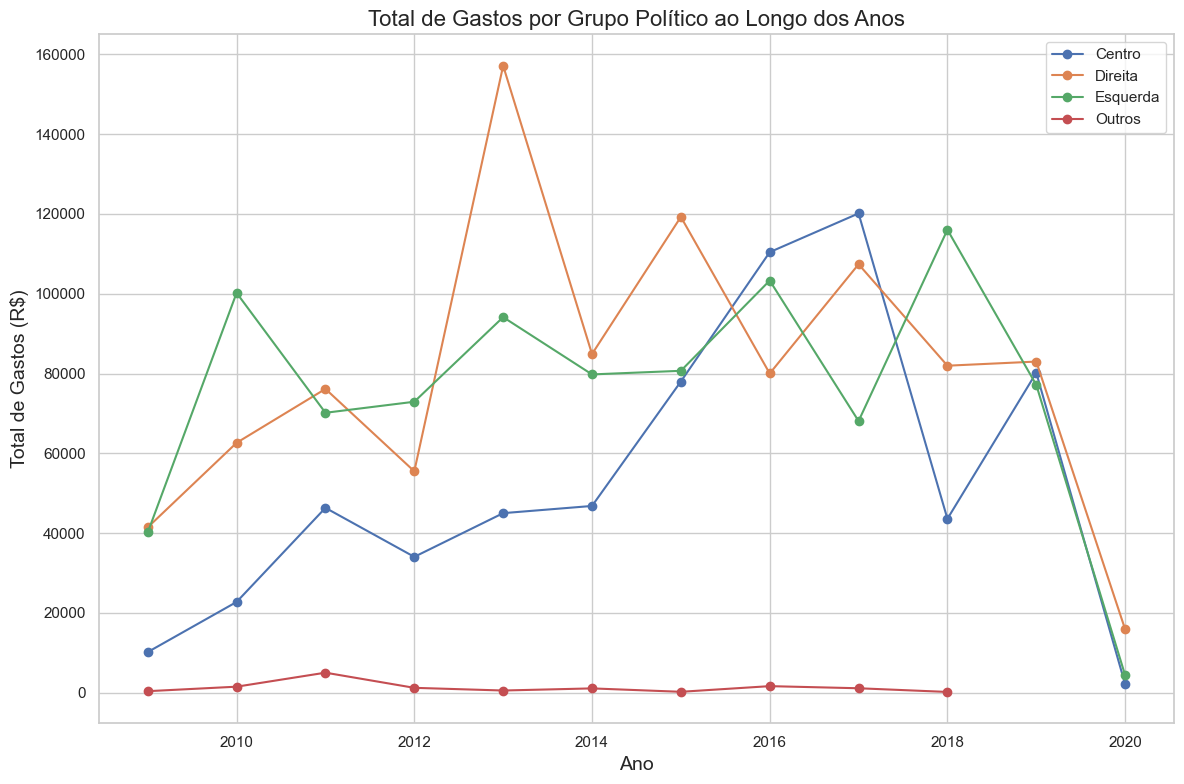

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(data_gasto_de_cada_grupo['Data dos gastos'], data_gasto_de_cada_grupo['Total Gasto Centro'], label='Centro', marker='o')
plt.plot(data_gasto_de_cada_grupo['Data dos gastos'], data_gasto_de_cada_grupo['Total Gasto Direita'], label='Direita', marker='o')
plt.plot(data_gasto_de_cada_grupo['Data dos gastos'], data_gasto_de_cada_grupo['Total Gasto Esquerda'], label='Esquerda', marker='o')
plt.plot(data_gasto_de_cada_grupo['Data dos gastos'], data_gasto_de_cada_grupo['Total Gasto Outros'], label='Outros', marker='o')
plt.title('Total de Gastos por Grupo Político ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Total de Gastos (R$)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()